## Building A Neural Network Using PyTorch On A Toy Dataset

In [1]:
import torch
x=[[1,2],[3,4],[5,6],[7,8]]
y=[[3],[7],[11],[15]]

In [2]:
X=torch.tensor(x).float()
Y=torch.tensor(y).float()

In [3]:
device='cuda' if torch.cuda.is_available() else 'cpu'
X=X.to(device)
Y=Y.to(device)

In [4]:
import torch.nn as nn

In [5]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer=nn.Linear(2,8)
        self.hidden_layer_activation=nn.ReLU()
        self.hidden_to_output_layer=nn.Linear(8,1)
    def forward(self,x):
        x=self.input_to_hidden_layer(x)
        x=self.hidden_layer_activation(x)
        x=self.hidden_to_output_layer(x)
        return x

In [6]:
# NOTE - This line of code is not part of model building
# this is used only for illustration of Linear method
print(nn.Linear(2,7))

Linear(in_features=2, out_features=7, bias=True)


In [7]:
mynet=MyNeuralNet().to(device)

In [8]:
# NOTE - This line of code is not a part of model building
# this is used only for illustration of
# how to obtain parameters of a given layer
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[-0.2736,  0.0025],
        [ 0.3942, -0.0099],
        [ 0.4391, -0.2377],
        [-0.0700,  0.4219],
        [ 0.1923, -0.1851],
        [-0.5754, -0.2932],
        [ 0.0049,  0.5871],
        [-0.2904, -0.6435]], device='cuda:0', requires_grad=True)

In [9]:
# NOTE - This line of code is not a part of  model building,
# this is used only for illustration of
# how to obtain parameters of all layers in a model
mynet.parameters()

<generator object Module.parameters at 0x0000013CE0295660>

In [10]:
# NOTE - This line of code is not a part of model building,
# this is used only for illustration of how to
# obtain parameters of all layers in a model
# by looping through the generator object
for par in mynet.parameters():
    print(par)

Parameter containing:
tensor([[-0.2736,  0.0025],
        [ 0.3942, -0.0099],
        [ 0.4391, -0.2377],
        [-0.0700,  0.4219],
        [ 0.1923, -0.1851],
        [-0.5754, -0.2932],
        [ 0.0049,  0.5871],
        [-0.2904, -0.6435]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.2396, -0.4252,  0.2028, -0.2343, -0.6026, -0.0748,  0.2241,  0.3897],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.3353, -0.1080,  0.1286,  0.0132, -0.0629,  0.3372,  0.2478, -0.1275]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.3074], device='cuda:0', requires_grad=True)


In [11]:
# for illustration only
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer=nn.Parameter(torch.rand(2,8))
        self.hidden_layer_activation=nn.ReLU()
        self.hidden_to_output_layer=nn.Parameter(torch.rand(8,1))
    def forward(self,x):
        x=x@self.input_to_hidden_layer
        x=self.hidden_layer_activation(x)
        x=x@self.hidden_to_output_layer
        return x

In [12]:
loss_func=nn.MSELoss()

In [13]:
_Y=mynet(X)
loss_value=loss_func(_Y,Y)
print(loss_value)
#
# Note that loss value can differ in your instance
# due to a different random weight initialization

tensor(89.9530, device='cuda:0', grad_fn=<MseLossBackward0>)


In [14]:
from torch.optim import SGD
opt=SGD(mynet.parameters(),lr=0.001)

In [15]:
# NOTE - This line of code is not a part of model building,
# this is used only for illustration of how we perform
opt.zero_grad()  # flush the previous epoch's gradients
loss_value=loss_func(mynet(X),Y)   # compute loss
loss_value.backward()  # perform back-propagation
opt.step()  # update the weights according to the gradients computed

In [16]:
loss_history=[]
for _ in range(50):
    opt.zero_grad()
    loss_value=loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

Text(0, 0.5, 'loss value')

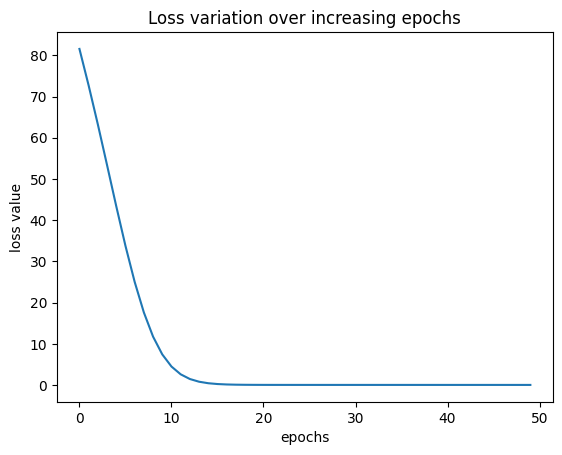

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')